## Exercise for k means tutorial
    1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
    2. Figure out if any preprocessing such as scaling would help here
    3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
# Load data into dataframe
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# get more information about data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)

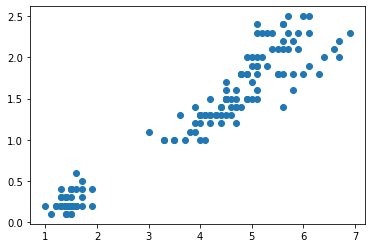

In [8]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [12]:
km = KMeans(n_clusters=2)
predicted = km.fit_predict(df)

In [13]:
df['flowers'] = predicted

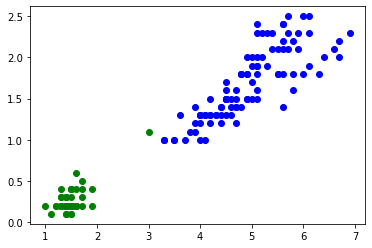

In [16]:
df1,df2 = df[df['flowers']==0], df[df['flowers']==1]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')

In [22]:
cluster_range = range(1,10)
sse = []
for k in cluster_range:
    km = KMeans(k)
    km.fit(df.drop('flowers', axis = 1))
    sse.append(km.inertia_)

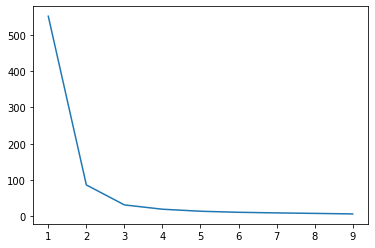

In [23]:
plt.plot(cluster_range,sse)